In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Universities.csv')
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90




*   As we dealing with unsupervised data, there is no target column and independant columns
*   We are just trying to find the similarities between the data points and cluster them



In [ ]:
df.describe()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000
mean,1266.440000,76.480000,39.200000,12.72000,27388.000000,86.720000
std,108.359771,19.433905,19.727308,4.06735,14424.883165,9.057778
min,1005.000000,28.000000,14.000000,6.00000,8704.000000,67.000000
25%,1240.000000,74.000000,24.000000,11.00000,15140.000000,81.000000
50%,1285.000000,81.000000,36.000000,12.00000,27553.000000,90.000000
75%,1340.000000,90.000000,50.000000,14.00000,34870.000000,94.000000
max,1415.000000,100.000000,90.000000,25.00000,63575.000000,97.000000




*   In **clustering**, we always deal with distances, so feature scaling is **mandatory**




**Feature Scaling**

In [ ]:
# Data Transformation

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = sc.fit_transform(df.iloc[:,1:])
X

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [ ]:
#if we want trhis in form of dataframe with column names

X = pd.DataFrame (sc.fit_transform(df.iloc[:,1:]), columns = df.iloc[:,1:].columns)
X.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.410284,0.657519,-0.889867,0.070260,-0.331413,0.820303
1,1.399259,1.235212,-0.734657,-1.686251,2.560381,-0.644524
2,-0.060657,-0.760454,1.024382,-0.933460,-0.167121,-1.658634
3,0.410284,-0.025208,-0.786394,-0.180670,0.291649,0.144229
4,0.127719,0.342414,-0.320766,0.070260,-0.390846,0.369587


As we can see, Data is scaled down

**Model Building**

*   First we need to mention the linkage and create dendogram
*   Based on dendogram we can say how many clusters we want



In [ ]:
# Creation on linkage and dendogram

from scipy.cluster import hierarchy
lk = hierarchy.linkage(X)  #default is single linkage

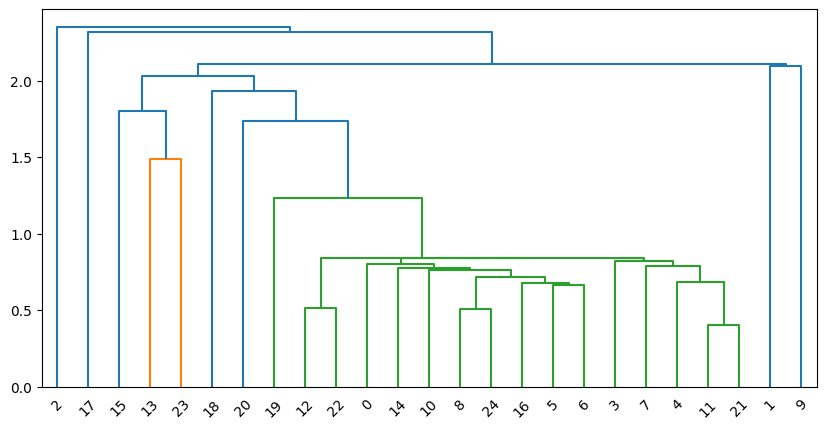

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 100

dendogram = hierarchy.dendrogram(lk)

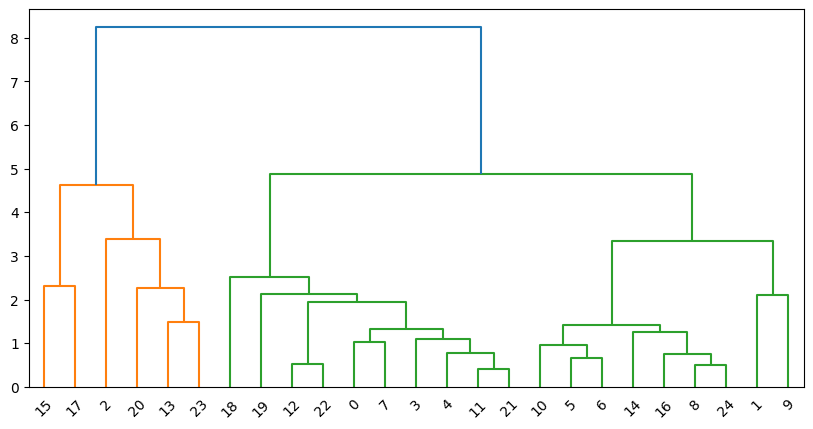

In [ ]:
 #we can change linkage to complete or average depending upon the our requirement

lk = hierarchy.linkage( X, method = 'complete') 
dendogram = hierarchy.dendrogram(lk)

This dendogram look appropriate, lets proceed with this and cut the cluster into 4 clusters. So, we can cut the dendogram at aproximately 4

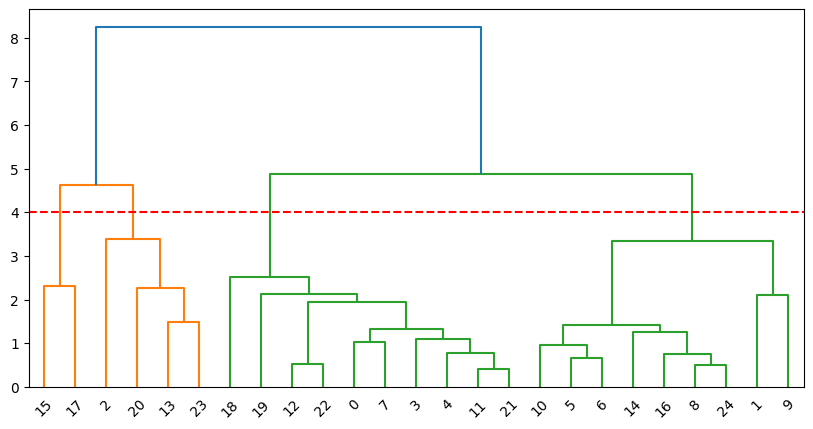

In [ ]:
lk = hierarchy.linkage( X, method = 'complete') 
dendogram = hierarchy.dendrogram(lk)
plt.axhline(y = 4 , c = 'red', linestyle = '--')

In [ ]:
# Model building

from sklearn.cluster import AgglomerativeClustering


In [ ]:
hc = AgglomerativeClustering (n_clusters= 4)

In [ ]:
cluster_label = hc.fit_predict(X)                              #fit_predict is here, we r saying to calculate/learn about the data and predict the clusters labels

In [ ]:
cluster_label

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3])

In [ ]:
#join this cluster_label in the dataframe

df['Cluster'] = cluster_label
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0


In [ ]:
#To see clusters formed, we can just filter the clusters from clusterlabel column

df[df.Cluster == 1]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
13,PennState,1081,38,54,18,10185,80,1
15,Purdue,1005,28,90,19,9066,69,1
17,TexasA&M,1075,49,67,25,8704,67,1
23,UWisconsin,1085,40,69,15,11857,71,1


In [ ]:
df[df.Cluster == 2]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [ ]:
df[df.Cluster == 3]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
5,Dartmouth,1340,89,23,10,32162,95,3
6,Duke,1315,90,30,12,31585,95,3
8,Harvard,1400,91,14,11,39525,97,3
10,MIT,1380,94,30,10,34870,91,3
14,Princeton,1375,91,14,8,30220,95,3
16,Stanford,1360,90,20,12,36450,93,3
24,Yale,1375,95,19,11,43514,96,3


In [ ]:
df[df.Cluster == 0]

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,0
2,CMU,1260,62,59,9,25026,72,0
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
7,Georgetown,1255,74,24,12,20126,92,0
11,Northwestern,1260,85,39,11,28052,89,0
12,NotreDame,1255,81,42,13,15122,94,0
18,UCBerkeley,1240,95,40,17,15140,78,0
19,UChicago,1290,75,50,13,38380,87,0
20,UMichigan,1180,65,68,16,15470,85,0


In [ ]:
#Lets see the mean of each cluster to see how they are grouped

In [ ]:
df.groupby('Cluster').agg('mean')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


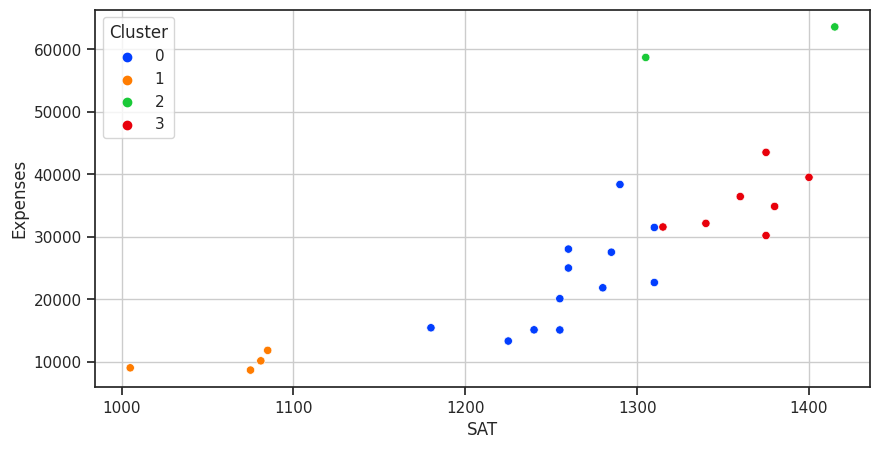

In [ ]:
sns.scatterplot(x = 'SAT', y = 'Expenses', data = df, hue ='Cluster', palette='bright')
plt.grid()
plt.show()

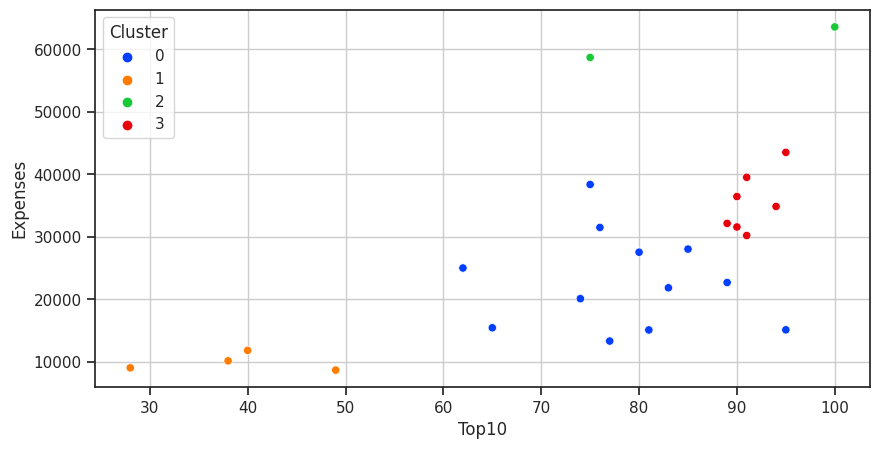

In [ ]:
sns.scatterplot(x = 'Top10', y = 'Expenses', data = df, hue ='Cluster', palette='bright')
plt.grid()
plt.show()

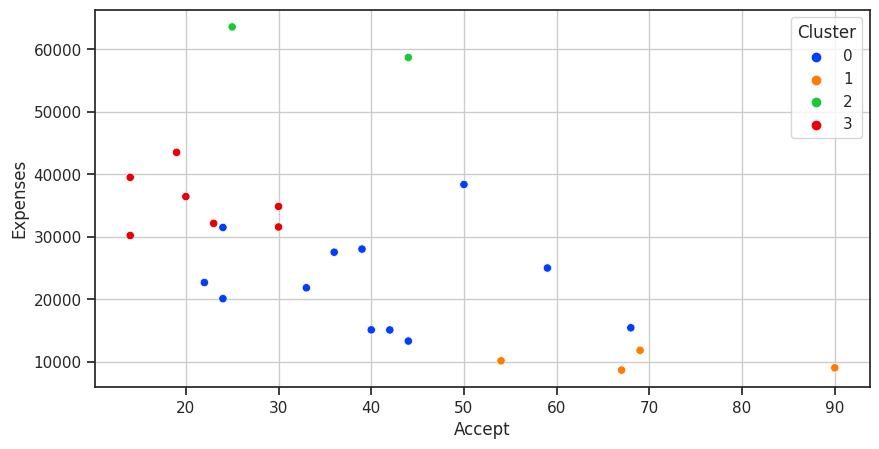

In [ ]:
sns.scatterplot(x = 'Accept', y = 'Expenses', data = df, hue ='Cluster', palette='bright')
plt.grid()
plt.show()